ICP08 DNN - Assignment

In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

In [3]:
mnist = datasets.load_digits()

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(len(mnist.data))

1797


In [6]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


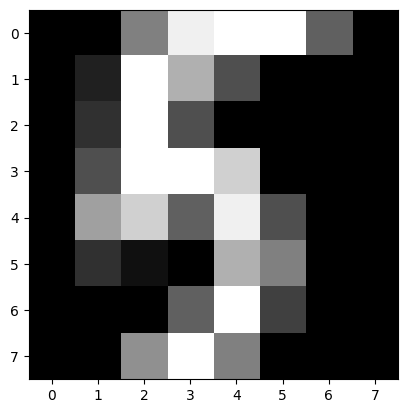

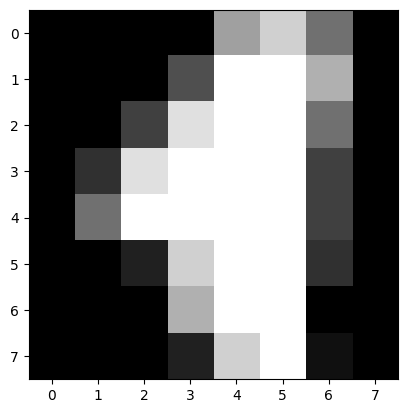

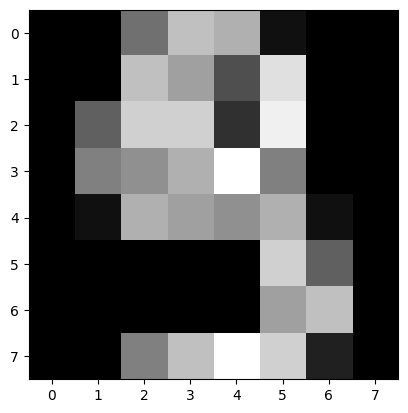

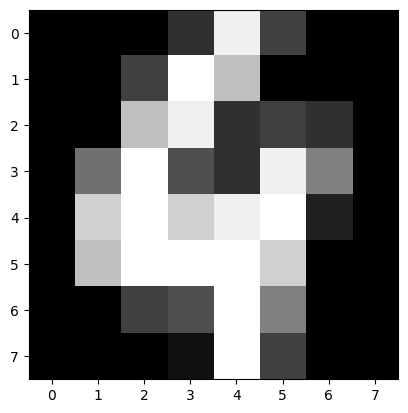

In [9]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

Using Keras

In [11]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

In [12]:
%%time

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(64))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


CPU times: user 174 ms, sys: 11.3 ms, total: 186 ms
Wall time: 720 ms


In [14]:
%%time

# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)


Epoch 1/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9979 - val_loss: 0.1194 - val_accuracy: 0.9611
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9972 - val_loss: 0.1230 - val_accuracy: 0.9528
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0227 - accuracy: 0.9972 - val_loss: 0.1216 - val_accuracy: 0.9556
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0212 - accuracy: 0.9979 - val_loss: 0.1283 - val_accuracy: 0.9500
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0203 - accuracy: 0.9979 - val_loss: 0.1129 - val_accuracy: 0.9639
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9986 - val_loss: 0.1208 - val_accuracy: 0.9556
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9993 - val_loss: 0.1123 - val_accuracy: 0.9556
Epoch 8/20
15/15 

In [15]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.10570548474788666, 0.9638888835906982]

In [16]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.11
accuracy: 96.39%


Wide and Deep Network

In [17]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=64))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [19]:
# Fit the model

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)

Epoch 1/20
15/15 [==============================] - 1s 17ms/step - loss: 1.9642 - accuracy: 0.5331 - val_loss: 0.3993 - val_accuracy: 0.8889
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.8907 - val_loss: 0.3035 - val_accuracy: 0.9083
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 0.1966 - accuracy: 0.9346 - val_loss: 0.1565 - val_accuracy: 0.9500
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9680 - val_loss: 0.1771 - val_accuracy: 0.9361
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0677 - accuracy: 0.9743 - val_loss: 0.1138 - val_accuracy: 0.9639
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.1690 - val_accuracy: 0.9361
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0597 - accuracy: 0.9826 - val_loss: 0.1414 - val_accuracy: 0.9694
Epoch 8/20
15/15 [=

In [20]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.15897148847579956, 0.9694444537162781]

In [21]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.16
accuracy: 96.94%


Random Grid Search

In [25]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotUniform(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


CPU times: user 596 ms, sys: 47.6 ms, total: 644 ms
Wall time: 869 ms


In [27]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout = 0.0
)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [29]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


3/3 [==============================] - 0s 4ms/step


3/3 [==============================] - 0s 7ms/step


5/5 [==============================] - 0s 3ms/step


In [30]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.005,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0,
 'epochs': 100,
 'batch_size': 60}

In [31]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.005, 'optimizer': 'adam', 'model__hidden_layer_sizes': (70,), 'model__dropout': 0, 'epochs': 100, 'batch_size': 60}


In [32]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       0.97      1.00      0.99        36
           3       1.00      0.98      0.99        41
           4       0.90      1.00      0.95        38
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       0.97      0.97      0.97        29
           9       0.97      0.94      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

CPU times: user 183 ms, sys: 8.79 ms, total: 192 ms
Wall time: 470 ms


Random Grid Search with different parameters

In [33]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotUniform(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.03, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


CPU times: user 1.16 ms, sys: 0 ns, total: 1.16 ms
Wall time: 3.04 ms


In [34]:
#from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=50,
    dropout = 0.0
)


In [35]:
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [36]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=4, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


5/5 [==============================] - 0s 3ms/step


In [37]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.005,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (90,),
 'model__dropout': 0,
 'epochs': 50,
 'batch_size': 20}

In [38]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.005, 'optimizer': 'adam', 'model__hidden_layer_sizes': (90,), 'model__dropout': 0, 'epochs': 50, 'batch_size': 20}


In [39]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       0.97      0.95      0.96        38
           5       0.88      1.00      0.94        30
           6       1.00      1.00      1.00        37
           7       0.97      0.92      0.94        37
           8       1.00      0.93      0.96        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

CPU times: user 205 ms, sys: 7.59 ms, total: 212 ms
Wall time: 312 ms


Conclusion:

By comparing the two different set of paramaters, we observe the new reduced standard deviation of 0.03 from 0.05 when adding bias to the activation function and by reduced hidden layer size of 50 in the Keras Classifier. Overall, the runtime was increased by about 35%(4 min). Accuracy is still at 97%, the weighted score of f1, precision have all gone up from 97 to 98%. There has definitely been improvement in terms of performance with the new parameters, just not significant enough on 'accuracy', the metric for measure here.